# Exam02
# CSC 790 - Deep Learning
# Author: Rafail Islam


# Problem 1

In [1]:
import tensorflow as tf
import tensorflow.keras as ks
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
import time
from sklearn import preprocessing

In [2]:
# 
def load_data():
    ''' this function returns dataset for traing and testing
    '''
    
    trainDf = pd.read_csv('Exam02_data/Problem 1/p1_train.csv')
    testDf = pd.read_csv('Exam02_data/Problem 1/p1_test.csv')

    # dataframe to numpy arrays
    train = trainDf.to_numpy()
    test = testDf.to_numpy()
   
    # split features and labels
    X_train,y_train = train[:,:-1].astype("float32"),train[:,-1].astype("float32")
    X_test, y_test = test[:,:-1].astype("float32"),test[:,-1].astype("float32")
    #print(X_train[0])
    
    # Normalizing data ( Mix-Max normalizing)
    X_train = (X_train -(-1))/(1-(-1))
    X_test = (X_test -(-1) )/(1-(-1))
    #print(X_train[0])
    #print(X_test[0])
    return X_train,y_train,X_test, y_test

In [3]:
def build_model(input_space):
    ''' this function return a compiled model
    '''
    # add layers
    x = ks.layers.Input(shape=(input_space,))
    hl = ks.layers.Dense(10,activation='relu')(x)
    #hl = ks.layers.Dense(10,activation='relu')(hl)
    #hl = ks.layers.Dense(8,activation='relu')(hl)
    #hl = ks.layers.Dense(408,activation='relu')(hl)
    output = ks.layers.Dense(3)(hl)
    
    model = ks.Model(inputs=x, outputs=output)
    model.compile(
        optimizer = tf.keras.optimizers.Adam(),
        loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=[tf.keras.metrics.SparseCategoricalAccuracy()] )
    return model

In [4]:
X_train,y_train,X_test, y_test = load_data()
model = build_model(X_train.shape[1])
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 561)]             0         
_________________________________________________________________
dense (Dense)                (None, 10)                5620      
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 33        
Total params: 5,653
Trainable params: 5,653
Non-trainable params: 0
_________________________________________________________________


In [15]:


# 20% validation data
vlen = int(len(X_train)*0.2) 
x_val = X_train[-vlen:]
y_val = y_train[-vlen:]

history = model.fit(
    X_train,
    y_train,
    batch_size = 32,
    epochs = 100,
    validation_data=(x_val, y_val),
    verbose = 2
    )

Train on 2999 samples, validate on 599 samples
Epoch 1/100
2999/2999 - 0s - loss: 0.0442 - sparse_categorical_accuracy: 0.9860 - val_loss: 0.0014 - val_sparse_categorical_accuracy: 1.0000
Epoch 2/100
2999/2999 - 0s - loss: 0.0496 - sparse_categorical_accuracy: 0.9827 - val_loss: 0.0014 - val_sparse_categorical_accuracy: 1.0000
Epoch 3/100
2999/2999 - 0s - loss: 0.0467 - sparse_categorical_accuracy: 0.9823 - val_loss: 9.8704e-04 - val_sparse_categorical_accuracy: 1.0000
Epoch 4/100
2999/2999 - 0s - loss: 0.0448 - sparse_categorical_accuracy: 0.9843 - val_loss: 0.0015 - val_sparse_categorical_accuracy: 1.0000
Epoch 5/100
2999/2999 - 0s - loss: 0.0440 - sparse_categorical_accuracy: 0.9853 - val_loss: 0.0016 - val_sparse_categorical_accuracy: 1.0000
Epoch 6/100
2999/2999 - 0s - loss: 0.0449 - sparse_categorical_accuracy: 0.9870 - val_loss: 0.0011 - val_sparse_categorical_accuracy: 1.0000
Epoch 7/100
2999/2999 - 0s - loss: 0.0520 - sparse_categorical_accuracy: 0.9807 - val_loss: 0.0011 - va

Epoch 58/100
2999/2999 - 0s - loss: 0.0331 - sparse_categorical_accuracy: 0.9897 - val_loss: 6.5149e-04 - val_sparse_categorical_accuracy: 1.0000
Epoch 59/100
2999/2999 - 0s - loss: 0.0342 - sparse_categorical_accuracy: 0.9883 - val_loss: 7.5897e-04 - val_sparse_categorical_accuracy: 1.0000
Epoch 60/100
2999/2999 - 0s - loss: 0.0353 - sparse_categorical_accuracy: 0.9867 - val_loss: 4.2782e-04 - val_sparse_categorical_accuracy: 1.0000
Epoch 61/100
2999/2999 - 0s - loss: 0.0336 - sparse_categorical_accuracy: 0.9890 - val_loss: 3.6107e-04 - val_sparse_categorical_accuracy: 1.0000
Epoch 62/100
2999/2999 - 0s - loss: 0.0360 - sparse_categorical_accuracy: 0.9870 - val_loss: 3.6030e-04 - val_sparse_categorical_accuracy: 1.0000
Epoch 63/100
2999/2999 - 0s - loss: 0.0343 - sparse_categorical_accuracy: 0.9873 - val_loss: 4.8148e-04 - val_sparse_categorical_accuracy: 1.0000
Epoch 64/100
2999/2999 - 0s - loss: 0.0319 - sparse_categorical_accuracy: 0.9887 - val_loss: 4.7235e-04 - val_sparse_categor

dict_keys(['loss', 'sparse_categorical_accuracy', 'val_loss', 'val_sparse_categorical_accuracy'])


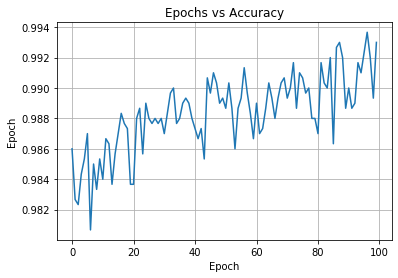

In [16]:
print(history.history.keys())
plt.plot(history.history['sparse_categorical_accuracy'])
plt.xlabel("Epoch")
plt.ylabel("Epoch")
plt.title("Epochs vs Accuracy")
plt.grid()

In [17]:
results = model.evaluate(X_test,y_test,verbose =0)
print("\nTest accuracy: %.2f%%" %(results[1]*100))


Test accuracy: 95.67%


# Here, we load the previously saved model.

In [18]:
# Save the model
model.save('my_model_1hidden_10') 

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: my_model_1hidden_10\assets


In [19]:
# Load the model 
new_model = tf.keras.models.load_model('my_model_1hidden_10')

In [20]:
new_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   


ValueError: You tried to call `count_params` on input_1, but the layer isn't built. You can build it manually via: `input_1.build(batch_input_shape)`.

In [21]:
# Evaluate the restored model
loss, acc = new_model.evaluate(X_test,  y_test, verbose=2)
print('Restored model, accuracy: {:5.2f}%'.format(100*acc))

1063/1 - 0s - loss: 0.0759 - sparse_categorical_accuracy: 0.9567
Restored model, accuracy: 95.67%


# Problem 2

In [ ]:
trainDf = pd.read_csv('Exam02_data/Problem2/p2_train.csv')
testDf = pd.read_csv('Exam02_data/Problem2/p2_test.csv')

In [ ]:
def load_data2():
    
    trainDf = pd.read_csv('Exam02_data/Problem2/p2_train.csv')
    testDf = pd.read_csv('Exam02_data/Problem2/p2_test.csv')
    # dataframe to numpy arrays
    train = trainDf.to_numpy().astype("float32")
    test = testDf.to_numpy().astype("float32")
   
    # split features and labels
    X_train,y_train = train[:,:-1],train[:,-1]
    X_test, y_test = test[:,:-1],test[:,-1]
    
    # Normalizing data ( Mix-Max normalizing)
    min_max_scaler = preprocessing.MinMaxScaler()
    X_train_minmax = min_max_scaler.fit_transform(X_train)
    X_test_minmax = min_max_scaler.transform(X_test)
    #print(X_train[0])
    #print(X_test[0])
    return X_train_minmax, y_train, X_test_minmax, y_test
x, _, _,_=load_data2()


In [ ]:
def build_model2(input_space):
    ''' this function return a compiled model
    '''
    # add layers
    x = ks.layers.Input(shape=(input_space,))
    hl = ks.layers.Dense(32,activation='relu')(x)
    hl = ks.layers.Dense(64,activation='relu')(hl)
    #hl = ks.layers.Dense(8,activation='relu')(hl)
    #hl = ks.layers.Dense(408,activation='relu')(hl)
    output = ks.layers.Dense(2)(hl)
    
    model = ks.Model(inputs=x, outputs=output)
    model.compile(
        optimizer = tf.keras.optimizers.Adam(),
        loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=[tf.keras.metrics.SparseCategoricalAccuracy()] )
    return model

In [ ]:
def build_model3(input_space):
    ''' this function return a compiled model
    '''
    # add layers
    x = ks.layers.Input(shape=(input_space,))
    hl = ks.layers.Dense(128,activation='relu')(x)
    hl = ks.layers.Dense(256,activation='relu')(hl)
    #hl = ks.layers.Dense(128,activation='relu')(hl)
    #hl = ks.layers.Dense(408,activation='relu')(hl)
    output = ks.layers.Dense(1, activation='sigmoid')(hl)
    
    model = ks.Model(inputs=x, outputs=output)
    model.compile(
        optimizer = tf.keras.optimizers.Adam(),
        loss = tf.keras.losses.BinaryCrossentropy(),
        metrics=['accuracy'] )
    return model

In [ ]:
X_train,y_train,X_test, y_test = load_data2()
model2 = build_model3(X_train.shape[1])
model2.summary()

In [ ]:
# 20% validation data
vlen = int(len(X_train)*0.2) 
x_val = X_train[-vlen:]
y_val = y_train[-vlen:]

history1 = model2.fit(
    X_train,
    y_train,
    batch_size = 128,
    epochs = 100,
    validation_data=(x_val, y_val),
    verbose = 2
    )

In [ ]:
print(history1.history.keys())
plt.plot(history1.history['accuracy'])
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Epochs vs Accuracy")
plt.grid()


In [ ]:
results = model2.evaluate(X_test,y_test)
print("\nTest accuracy: %.2f%%" %(results[1]*100))

In [ ]:
# Save the model
model.save('my_model2_3hidden_128_256_128') 

In [ ]:
# Load the model 
new_model1 = tf.keras.models.load_model('my_model2_3hidden_128_256_128')

In [ ]:
new_model1.summary()

In [ ]:
# Evaluate the restored model
loss, acc = new_model1.evaluate(X_test,  y_test, verbose=2)
print('Restored model, accuracy: {:5.2f}%'.format(100*acc))